## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
print(round(df['converted'].mean()*100,3), '%')

11.966 %


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# I wanted to try this step using both groupby and query.
df.groupby(['group', 'landing_page'])['group'].count()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: group, dtype: int64

In [7]:
non_match = df.query("group == 'treatment' & landing_page != 'new_page'")\
.count() + df.query("group == 'control' & landing_page != 'old_page'").count()
print(non_match)

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64


f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

These two articles were useful in creating the functions that follow:
https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns, 
https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

In [9]:
df['group_ID'] = np.where(df['group']=='control', 1, 0)
df['landing_ID'] = np.where(df['landing_page']=='old_page', 1, 0)
df['group_landing_sum'] = df['group_ID'] + df['landing_ID']

In [10]:
df2 = df.drop(df[df.group_landing_sum == 1].index)

In [11]:
df.head()

,user_id,timestamp,group,landing_page,converted,group_ID,landing_ID,group_landing_sum
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,2
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,2
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,2


In [12]:
df2.drop(['group_ID', 'landing_ID'], axis=1, inplace=True)

In [13]:
df2.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted',
       'group_landing_sum'],
      dtype='object')

In [14]:
df2.shape

(290585, 6)

Hmm. Interesting, this is one more row than we were expecting based on the 'nunique' function used above.

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted,group_landing_sum
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,0


c. What is the row information for the repeat **user_id**? 

In [19]:
print(df2[df2['user_id'] == 773192])

      user_id                   timestamp      group landing_page  converted  \
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0   
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0   

      group_landing_sum  
1899                  0  
2893                  0  


In [21]:
df2[df2['user_id'] == 773192].index

Int64Index([1899, 2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [22]:
df2.drop_duplicates(['user_id'], keep='first', inplace=True)

In [23]:
# Let's double check that all duplicates are gone.
df2.duplicated().value_counts()

False    290584
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [24]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [25]:
df2.query("group == 'control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
df2.query("group == 'treatment'")['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [27]:
num_new_page = df2[df2['landing_page'] == 'new_page']['user_id'].count()
print(round(num_new_page / df2.shape[0] *100,4) , '%')

50.0062 %


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**  The conversion rates for the two groups are very similar.  Both are very close to 12.0%.  Based on these percentages it appears that there is not sufficient evidence to say that the new treatment page leads to more conversions.  

Moreover we could be dealing with a situation where recurring users simply preferred the old page hence the slightly higher conversion rate for the 'control' group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

Null:   $p_{old}$ ≥ $p_{new}$

Alternative:   $p_{new}$ > $p_{old}$ 

In [28]:
# Let's check the number of each outcome for use in our sampling.
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [29]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [30]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [50]:
n_new = df2.query("group == 'treatment'")['group'].count()
print(n_new)

145310


d. What is $n_{old}$?

In [51]:
n_old = df2.query("group == 'control'")['group'].count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [59]:
new_page_converted = np.random.binomial(1, p_new, n_new)
print(new_page_converted.sum())  # As a check, this number should be somewhere in the range of 17,379 each time.

17305


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [60]:
old_page_converted = np.random.binomial(1, p_old, n_old)
print(old_page_converted.sum()) # As a check, this number should be somewhere in the range of 17,374 each time.

17303


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [61]:
diff1 = new_page_converted.sum() - old_page_converted.sum()
print(diff1)

2


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [62]:
p_diffs = []
old_page_conv = np.random.binomial(n_old, p_old, int(1e4))
new_page_conv = np.random.binomial(n_new, p_new, int(1e4))
p_diff = new_page_conv - old_page_conv
p_diffs.append(p_diff)

In [63]:
# Let's make sure that the lists and the array came out as we were expecting.
print(old_page_conv[0:3])
print(new_page_conv[0:3])

[17279 17292 17502]
[17415 17283 17433]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  21.,  126.,  590., 1659., 2554., 2603., 1638.,  657.,  132.,
          20.]),
 array([-627. , -501.4, -375.8, -250.2, -124.6,    1. ,  126.6,  252.2,
         377.8,  503.4,  629. ]),
 <a list of 10 Patch objects>)

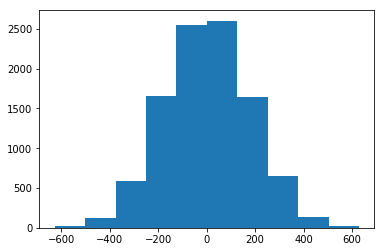

In [64]:
plt.hist(p_diffs)

Yes, this is approximately what I was expecting.  The graph is close to a normal approximation since we are looking at many examples of a difference of two random variables with similar expected values.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [65]:
(p_diffs > diff1).mean()

0.5002

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**
The value provided above is the p-value.  Since it is well in excess of 0.05 we should not reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [66]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'")['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()
n_old = df2[df2['group'] == 'control']['group'].count()
n_new = df2[df2['group'] == 'treatment']['group'].count()

In [67]:
print(convert_old, convert_new)
print(n_old)
print(type(n_old))
print(n_new)
print(type(n_new))

17489 17264
145274
<class 'numpy.int64'>
145310
<class 'numpy.int64'>


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [68]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score, p_value)

1.3109241984234394 0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer** The resulting z_score of 1.31 from our test is within the bounds of a 95% confidence interval +/- 1.96 so we should **not** reject the null hypothesis.  Likewise, the p_value of approximately 0.19 is substantially greater than 0.05 so we should not reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** We will be using *logistic regression* in this case since we are dealing with a binomial (purchase or don't purchase) type of outcome.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [69]:
ab_page = pd.get_dummies(df2['group'])
df2_new = df2.join(ab_page)
df2_new = df2_new.drop(['control'], axis=1)
df2_new['intercept'] = 1

In [70]:
df2_new.head()

,user_id,timestamp,group,landing_page,converted,group_landing_sum,treatment,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [71]:
lm1 = sm.Logit(df2_new['treatment'], df2_new[['intercept', 'converted']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [72]:
result1 = lm1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.752584
         Iterations 3


/Users/aaroneisenberg/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/aaroneisenberg/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/aaroneisenberg/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              treatment   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Jan 2019   Pseudo R-squ.:                     inf
Time:                        17:50:31   Log-Likelihood:            -2.1869e+05
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      0.004      0.516      0.606      -0.006       0.010
converted     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**:  The p_value here is 0.190 which is essentially the same p_value that we found using the stats proportions z_test.

The important difference to note between the two tests is that the A/B test uses a null hypothesis that states that the old page has conversion rates that are *greater than or equal* to the new test while the logistic regression uses a null hypothesis that states that the two are equal.  By not rejecting the null hypothesis in the A/B test we have strong evidence that the conversion rate of the old landing page is as good or better than that of the new landing page.  In the logistic regression test we simply have evidence to suggest that the conversion rates of the two landing pages are not equal.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** We should consider other factors in our regression model because conversion rates may be influenced by those additional factors.  For example, different time periods may produce different results.

One major disadvantage to adding additional factors into the regression model is that those factors may influence one another and those correlations will have to be taken into account.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [73]:
countries_df = pd.read_csv('./countries.csv')
df3 = countries_df.set_index('user_id').join(df2_new.set_index('user_id'), how='inner')

In [74]:
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [75]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df3['country'])

In [76]:
df3_new = df3.join(country_dummies)

In [77]:
df3_new.drop(['US'], axis=1, inplace=True)

In [78]:
df3_new.head()

,country,timestamp,group,landing_page,converted,group_landing_sum,treatment,intercept,CA,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,2,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,2,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0,1


In [79]:
lm2 = sm.OLS(df3_new['converted'], df3_new[['intercept', 'CA', 'UK']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Sat, 19 Jan 2019   Prob (F-statistic):              0.201
Time:                        17:50:46   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1195      0.001    166.244      0.000       0.118       0.121
CA            -0.0042      0.003     -1.516      0.130      -0.010       0.001
UK             0.0010      0.001      0.746      0.455      -0.002       0.004
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared values are zero so it appears that country does not have a meaningful impact on conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [80]:
ab_page2 = pd.get_dummies(df3_new['group'])

In [81]:
df3_new['control'] = ab_page2['control']

In [82]:
### Fit Linear Model And Obtain the Results
lm3 = sm.OLS(df3_new['converted'], df3_new[['intercept', 'CA', 'UK', 'treatment', 'control']])
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sat, 19 Jan 2019   Prob (F-statistic):              0.178
Time:                        17:50:52   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0797      0.000    166.245      0.000       0.079       0.081
CA            -0.0042      0.003     -1.514      0.130      -0.010       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
treatment      0.0391      0.001     60.304      0.000       0.038       0.040
control        0.0406      0.001     62.700      0.000       0.039       0.042
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                     3.08e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.82e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Similar to the country analysis, if we view a regression model that takes into account both the countries and the landing page groups then the R-squared factor is still zero.  This indicates that there is no meaningful correlation between the conversion rate and the different groups.

Below we can see a bar graph that compares the different groups by country.

In [83]:
# The following variables will allow us to graph the diffent conversion rates by group.

new_UK = (df3_new.query("landing_page == 'new_page' & country == 'UK'")['converted'].mean())*100
old_UK = (df3_new.query("landing_page == 'old_page' & country == 'UK'")['converted'].mean())*100
new_US = (df3_new.query("landing_page == 'new_page' & country == 'US'")['converted'].mean())*100
old_US = (df3_new.query("landing_page == 'old_page' & country == 'US'")['converted'].mean())*100
new_CA = (df3_new.query("landing_page == 'new_page' & country == 'CA'")['converted'].mean())*100
old_CA = (df3_new.query("landing_page == 'old_page' & country == 'CA'")['converted'].mean())*100

These two websites were very helpful in creating the bar graphs:
https://pythonspot.com/matplotlib-bar-chart/, https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

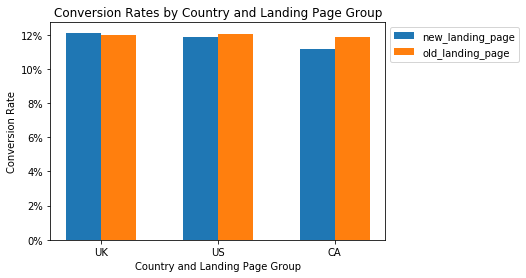

In [109]:
country_groups1 = [new_UK, new_US, new_CA]
country_groups2 = [old_UK, old_US, old_CA]
x1 = np.arange(len(country_groups1))
x2 = np.arange(len(country_groups2))
w = ['0%', '2%', '4%', '6%', '8%', '10%', '12%']
ax = plt.axes()

bar_width = .3
old_groups = plt.bar(x1, country_groups1, bar_width, label='new_landing_page')
new_groups = plt.bar(x1 + bar_width, country_groups2, bar_width, label='old_landing_page')
ax.yaxis.set_major_formatter(plt.FixedFormatter(w))
plt.title("Conversion Rates by Country and Landing Page Group")
plt.xlabel("Country and Landing Page Group")
plt.ylabel("Conversion Rate")
plt.xticks(y1 + .5*bar_width, ('UK', 'US', 'CA'))
plt.legend(bbox_to_anchor=(1.0, 1.0))

Small differences in conversion rates can have a meaningful impact on revenue to a business.  In this case, however, we can see in the graph above that in all three countries the conversion rates are very close between the old landing page and the new one.  The differences are less than one percent for all three countries.  The cost of implementing a new landing page may not be worth the additional sales and only the UK shows increased conversion rates from the new web page.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.